In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.metrics import silhouette_score
import plotly.express as px
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
%store -r X
%store -r Y

In [3]:
#kernel dies if the full set of data is used

X = X[0:8000]
Y = Y[0:8000]

In [4]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [6]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_normalized)
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['C1', 'C2']
X_pca

,C1,C2
0,0.163563,-0.209703
1,0.135485,-0.191570
2,0.181088,-0.052612
3,0.156817,-0.136920
4,0.268198,0.239781
...,...,...
7995,-0.254444,-0.039583
7996,-0.128281,0.307278
7997,-0.189921,0.061742
7998,-0.156646,0.049599


In [7]:
%store X_pca

Stored 'X_pca' (DataFrame)


In [29]:
linkages = ['average', 'ward', 'complete', 'single']
metrics = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
silhouettes = []

In [30]:
fig = plt.figure(figsize=(20,20))
idx = 1
best_model = None
max_score = float('-inf')

<Figure size 2000x2000 with 0 Axes>

In [31]:
for cluster in range(2, 10):
    for linkage in linkages:
        for metric in metrics:
            if linkage == 'ward' and metric != 'euclidean':
                continue
            agglomerative_model = AgglomerativeClustering(n_clusters = cluster, linkage = linkage, metric = metric)
            agglomerative_model.fit(X_pca)

            score = silhouette_score(X_pca, agglomerative_model.labels_)
            if score > max_score:
                max_score = score
                best_model = agglomerative_model

In [57]:
print(max_score)
print(best_model)
print(best_model.linkage)

0.6315740102032368
AgglomerativeClustering(linkage='average', metric='l1', n_clusters=4)
average


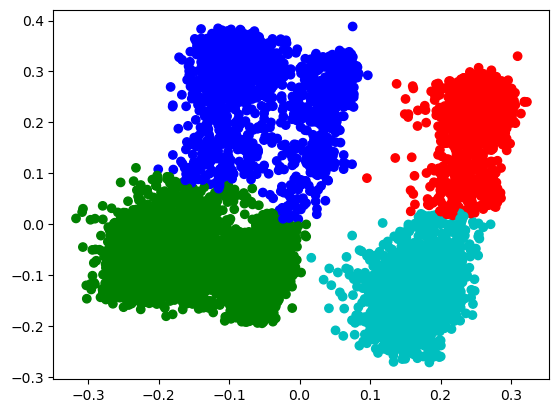

In [33]:
colors = np.array([x for x in 'bgrcmykbgr'])
plt.scatter(x = X_pca['C1'], y = X_pca['C2'], color = colors[best_model.labels_])

In [49]:
Z = linkage(X_pca, method = 'average')
Z

array([[6.36000000e+02, 1.31100000e+03, 5.28057523e-06, 2.00000000e+00],
       [1.35200000e+03, 2.63200000e+03, 3.79031566e-05, 2.00000000e+00],
       [7.24300000e+03, 7.90300000e+03, 7.05291402e-05, 2.00000000e+00],
       ...,
       [1.59840000e+04, 1.59940000e+04, 3.13641337e-01, 3.15100000e+03],
       [1.59930000e+04, 1.59950000e+04, 3.51469509e-01, 4.84900000e+03],
       [1.59960000e+04, 1.59970000e+04, 3.83999928e-01, 8.00000000e+03]])

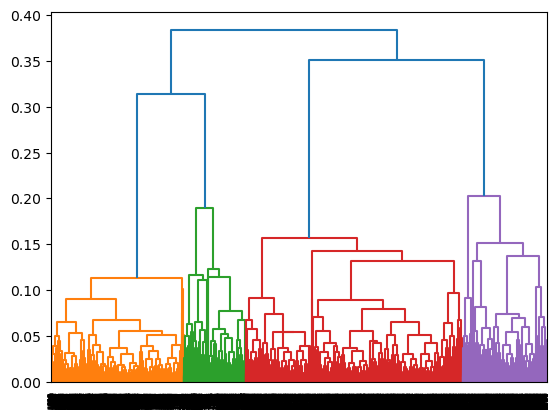

In [54]:
_ = dendrogram(Z)